<a href="https://colab.research.google.com/github/AKAS1012/News_Parkinsons/blob/master/Parkinsion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
TB_df=pd.read_csv(io.StringIO(uploaded['parkinsons.data.csv'].decode('utf-8')))

In [ ]:
TB_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
print(TB_df.shape)

(195, 24)


In [ ]:
TB_df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
TB_df = TB_df.loc[:,['Jitter:DDP','MDVP:PPQ']]
TB_df.head(5)

,Jitter:DDP,MDVP:PPQ
0,0.01109,0.00554
1,0.01394,0.00696
2,0.01633,0.00781
3,0.01505,0.00698
4,0.01966,0.00908


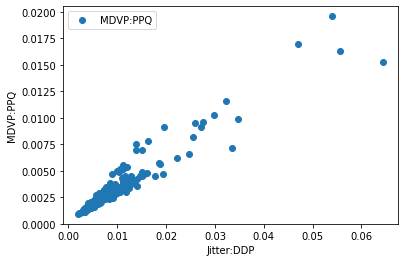

In [ ]:
import matplotlib.pyplot as plt
TB_df.plot(x='Jitter:DDP',y='MDVP:PPQ',style='o')
plt.xlabel('Jitter:DDP')
plt.ylabel('MDVP:PPQ')
plt.show()

In [ ]:
x=pd.DataFrame(TB_df['Jitter:DDP'])
y=pd.DataFrame(TB_df['MDVP:PPQ'])

In [ ]:
x.size,y.size

(195, 195)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test)

(156, 1)
(39, 1)
(156, 1)
     MDVP:PPQ
132   0.00170
16    0.00292
18    0.00432
51    0.00169
164   0.00461
145   0.00188
11    0.00336
27    0.00275
176   0.00213
118   0.00194
28    0.00176
170   0.00237
56    0.00514
116   0.00207
103   0.00136
31    0.00138
59    0.00520
40    0.00175
136   0.00283
95    0.00197
35    0.00115
107   0.00122
69    0.00354
84    0.00420
130   0.00238
99    0.00990
123   0.00449
29    0.00253
4     0.00908
167   0.00186
82    0.00348
188   0.00184
67    0.00463
190   0.00259
81    0.00371
112   0.00485
44    0.00137
181   0.00235
187   0.00148


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(regressor.intercept_)

[0.00051778]


In [ ]:
print(regressor.coef_)

[[0.29607419]]


In [ ]:
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['predicted'])

In [ ]:
y_pred

,predicted
0,0.002022
1,0.002389
2,0.003751
3,0.001681
4,0.004900
5,0.002016
6,0.003017
7,0.002735
8,0.002019
9,0.001915


In [ ]:
y_test

,MDVP:PPQ
132,0.00170
16,0.00292
18,0.00432
51,0.00169
164,0.00461
145,0.00188
11,0.00336
27,0.00275
176,0.00213
118,0.00194


In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0004337641078984428
Mean Squared Error: 4.476031254596369e-07
Root Mean Squared Error: 0.0006690314831602746
